<a href="https://colab.research.google.com/github/Gayatri-Jondhale/Assignment_DL/blob/main/Milknew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1=pd.read_csv("/content/milknew(152).csv")
print(df1.head())

    pH  Temprature  Taste  Odor  Fat   Turbidity  Colour   Grade
0  6.6          35      1     0     1          0     254    high
1  6.6          36      0     1     0          1     253    high
2  8.5          70      1     1     1          1     246     low
3  9.5          34      1     1     0          1     255     low
4  6.6          37      0     0     0          0     255  medium


In [3]:
df2=pd.read_csv("/content/monthly-milk-production.csv")
print(df2.head())

                 Month  Milk Production
0  1962-01-01 01:00:00            589.0
1  1962-02-01 01:00:00            561.0
2  1962-03-01 01:00:00            640.0
3  1962-04-01 01:00:00            656.0
4  1962-05-01 01:00:00            727.0


In [44]:
df1.shape

(1059, 18)

In [45]:
df2.shape

(168, 2)

In [4]:
df1.info()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Month            168 non-null    object 
 1   Milk Production  168 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.8+ KB


In [14]:
df1.describe()

,Milk Production
count,168.000000
mean,754.708333
std,102.204524
min,553.000000
25%,677.750000
50%,761.000000
75%,824.500000
max,969.000000


In [66]:
df2.describe()

,Milk Production
count,168.000000
mean,754.708333
std,102.204524
min,553.000000
25%,677.750000
50%,761.000000
75%,824.500000
max,969.000000


In [48]:
#cleaning the data
df1.isnull().sum()

,0
pH,0
Temprature,0
Taste,0
Odor,0
Fat,0
Turbidity,0
Colour,0
Grade,0
pH,0
Temprature,0


In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1['Grade']=le.fit_transform(df1['Grade'])
df1.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade_high,Grade_low,Grade_medium
0,6.6,35,1,0,1,0,254,0,6.6,35,1,0,1,0,254,True,False,False
1,6.6,36,0,1,0,1,253,0,6.6,36,0,1,0,1,253,True,False,False
2,8.5,70,1,1,1,1,246,1,8.5,70,1,1,1,1,246,False,True,False
3,9.5,34,1,1,0,1,255,1,9.5,34,1,1,0,1,255,False,True,False
4,6.6,37,0,0,0,0,255,2,6.6,37,0,0,0,0,255,False,False,True


In [12]:
x=df1.drop(['Grade_high','Grade_medium','Grade_low'],axis=1)
y=df1[['Grade_high','Grade_medium','Grade_low']]

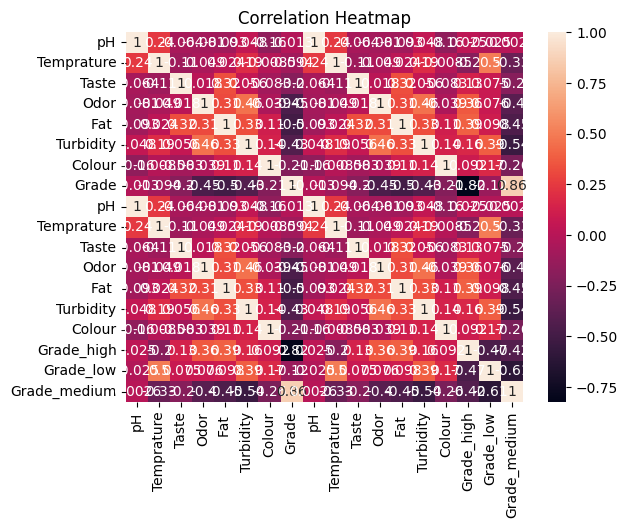

In [72]:
#relationship analysis
corr=df1.corr()
sns.heatmap(corr,annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler as standardScaler
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
S=standardScaler()
x_train=S.fit_transform(x_train)
x_test=S.transform(x_test)

In [17]:
x_test

array([[-0.01505782, -0.41330182,  0.91504655, ...,  0.6803433 ,
         1.00592071,  0.73268316],
       [-1.49480102,  1.62909399, -1.09284057, ...,  0.6803433 ,
         1.00592071, -0.43999756],
       [ 1.67607726, -0.10694245,  0.91504655, ...,  0.6803433 ,
         1.00592071, -0.43999756],
       ...,
       [ 0.1258701 , -0.31118203, -1.09284057, ..., -1.46984617,
        -0.99411413,  0.73268316],
       [-0.08552179, -0.82178098, -1.09284057, ...,  0.6803433 ,
        -0.99411413,  0.26361087],
       [-0.01505782,  0.09729713, -1.09284057, ...,  0.6803433 ,
         1.00592071, -0.43999756]])

In [67]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [68]:
model.fit(x_train,y_train)

LinearRegression()

In [69]:
y_pred=model.predict(x_test)

In [70]:
model.score(x_test,y_test)

0.6419394890039435

In [21]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
model.score(x_test,y_test)

1.0

In [23]:
from sklearn.neighbors import KNeighborsRegressor
model=KNeighborsRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
model.score(x_test,y_test)

0.9829225204739508

In [30]:
predicted_labels = np.argmax(y_pred, axis=1)
true_labels = np.argmax(y_test.values, axis=1)

In [31]:
cm=confusion_matrix(true_labels,predicted_labels)
cm

array([[48,  0,  0],
       [ 0, 86,  0],
       [ 1,  0, 77]])

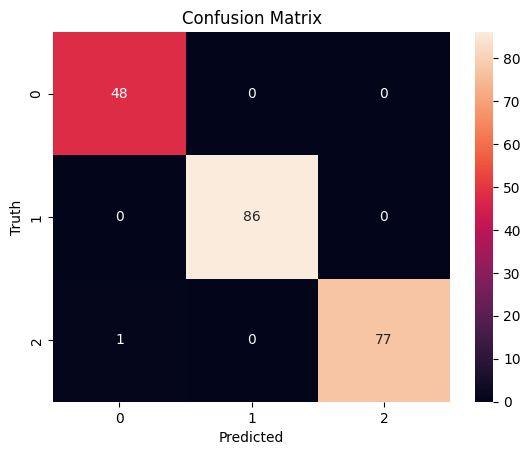

In [73]:
%matplotlib inline
import seaborn as sns
sns.heatmap(cm,annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [29]:
from sklearn.metrics import classification_report
print(classification_report(true_labels,predicted_labels))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        48
           1       1.00      1.00      1.00        86
           2       1.00      0.99      0.99        78

    accuracy                           1.00       212
   macro avg       0.99      1.00      0.99       212
weighted avg       1.00      1.00      1.00       212



In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

# Assuming y_train is a DataFrame with one-hot encoded columns
# Convert y_train to a 1d array of class labels
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train.idxmax(axis=1))

In [79]:
model = SVC()
model.fit(x_train, y_train_encoded)
y_pred = model.predict(x_test)
y_pred_decoded = le.inverse_transform(y_pred)

In [80]:
model = SVC()
model.fit(x_train, y_train_encoded)
y_pred = model.predict(x_test)
y_pred_decoded = le.inverse_transform(y_pred)


In [82]:
#Evaluate the model
model.score(x_test,le.transform(y_test.idxmax(axis=1)))

1.0

In [74]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [75]:
y_train_encoded = y_train.idxmax(axis=1)
y_train_encoded = le.fit_transform(y_train_encoded)

In [76]:
model = GaussianNB()
model.fit(x_train, y_train_encoded)

GaussianNB()

In [78]:
y_test_encoded = y_test.idxmax(axis=1)
y_test_encoded = le.transform(y_test_encoded)
y_pred = model.predict(x_test)
model.score(x_test, y_test_encoded)

1.0